In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
depression = pd.read_csv("Mental-Health-Twitter.csv")
df = depression.copy()

In [3]:
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [5]:
df.shape

(20000, 11)

In [6]:
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
0,Unnamed: 0,0.0
1,post_id,0.0
2,post_created,0.0
3,post_text,0.0
4,user_id,0.0
5,followers,0.0
6,friends,0.0
7,favourites,0.0
8,statuses,0.0
9,retweets,0.0


In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("post_id", axis=1, inplace=True)
df.drop("user_id", axis=1, inplace=True)

In [8]:
df.corr()

,followers,friends,favourites,statuses,retweets,label
followers,1.000000,0.891919,-0.016242,-0.000215,0.001500,-0.011181
friends,0.891919,1.000000,-0.081756,-0.045420,0.009946,0.119818
favourites,-0.016242,-0.081756,1.000000,-0.053930,0.069551,-0.252289
statuses,-0.000215,-0.045420,-0.053930,1.000000,-0.005193,-0.246473
retweets,0.001500,0.009946,0.069551,-0.005193,1.000000,-0.025198
label,-0.011181,0.119818,-0.252289,-0.246473,-0.025198,1.000000


In [9]:
df.post_created=df.post_created.apply(pd.to_datetime)

df["month"]=df.post_created.dt.month
df["year"]=df.post_created.dt.year

df.drop("post_created", axis=1, inplace=True)

In [10]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,8,2015
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,8,2015
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,8,2015
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,8,2015
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,8,2015


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
followers,20000.0,900.48395,1899.913961,0.0,177.0,476.0,1197.0,28614.0
friends,20000.0,782.42875,1834.817945,0.0,211.0,561.0,701.0,28514.0
favourites,20000.0,6398.23555,8393.072914,0.0,243.0,2752.0,8229.0,39008.0
statuses,20000.0,44394.41960,140778.519201,3.0,5129.0,13251.0,52892.0,1063601.0
retweets,20000.0,1437.92730,15119.665118,0.0,0.0,0.0,1.0,839540.0
label,20000.0,0.50000,0.500013,0.0,0.0,0.5,1.0,1.0
month,20000.0,6.71135,4.735351,1.0,1.0,8.0,12.0,12.0
year,20000.0,2015.48595,1.485434,2009.0,2015.0,2016.0,2016.0,2017.0


# Text Preprocessing

In [12]:
!pip install textblob
!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [13]:
#lowercase
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [14]:
#numerical values
df["post_text"] = df["post_text"].str.replace("\d","")

In [15]:
#punctation
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

In [16]:
#stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#lemmatization 
from textblob import Word
nltk.download("wordnet")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
#word tokenization
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

In [19]:
df["frequency"] = df["post_text"].apply(lambda x: len(str(x).split(" "))) 

In [20]:
df.groupby("frequency").max()
df[df["post_text"].str.contains("sos unique")]
longest_comment=df.iloc[3038,0]
print(longest_comment)

rt sos unique new york unique new york unique new york unique new york unique new york unique new york unique new york unique new york u


In [21]:
TextBlob(longest_comment).tags

[('rt', 'NN'),
 ('sos', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('u', 'NN')]

In [22]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,"[years, since, diagnosed, anxiety, depression,...",14
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,"[sunday, need, break, im, planning, spend, lit...",9
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",16
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,"[hard, say, whether, packing, lists, making, l...",14


# data visualization 

In [23]:
!pip install wordcloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [24]:
# we need convert all reviews to single text 

text = " ".join(i for i in df.post_text)

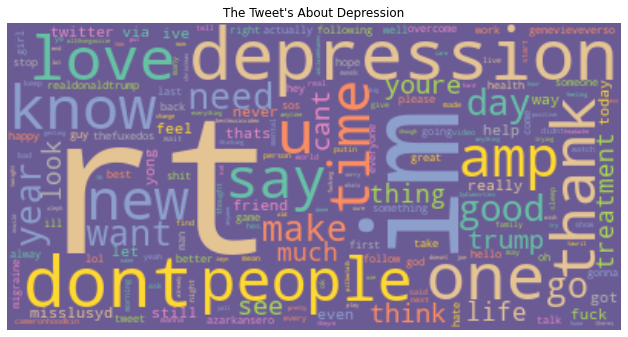

In [25]:
wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression")
plt.show()

In [26]:
print("\n",
      "\n",text.count("rt"),
      "\n",text.count("im"),
      "\n",text.count("one"),
      "\n",text.count("depression"),
      "\n",text.count("dont"),
      "\n",text.count("time"),
      "\n",text.count("love"),
      "\n",text.count("know"),
      "\n",text.count("thank"),
      "\n",text.count("people"),
     )


 
 6630 
 3328 
 2063 
 950 
 887 
 785 
 754 
 729 
 702 
 593


In [27]:
data = {
    "title": ["rt", "im" ,"one", "depression", "dont", "time", 
              "love","know","thank", "people"],
    "count": [6630, 3328 ,2063, 950, 887, 785, 754, 729, 702, 593],
}

In [28]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,rt,6630
1,im,3328
2,one,2063
3,depression,950
4,dont,887
5,time,785
6,love,754
7,know,729
8,thank,702
9,people,593


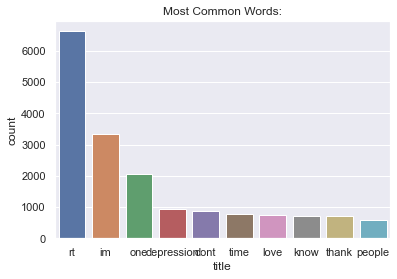

In [29]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=data, x="title", y="count").set(title="Most Common Words:");

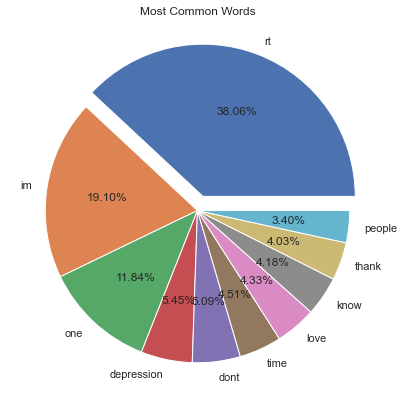

In [30]:
fig = plt.figure(figsize =(10, 7))
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0] 
plt.pie(data["count"], labels = data["title"], autopct='%1.2f%%', explode=myexplode)
plt.title("Most Common Words")

plt.show()

In [31]:
df.groupby("month").count()

,post_text,followers,friends,favourites,statuses,retweets,label,year,tokens,frequency
month,,,,,,,,,,
1,6118,6118,6118,6118,6118,6118,6118,6118,6118,6118
2,435,435,435,435,435,435,435,435,435,435
3,1123,1123,1123,1123,1123,1123,1123,1123,1123,1123
4,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
5,644,644,644,644,644,644,644,644,644,644
6,8,8,8,8,8,8,8,8,8,8
7,359,359,359,359,359,359,359,359,359,359
8,659,659,659,659,659,659,659,659,659,659
9,639,639,639,639,639,639,639,639,639,639


In [32]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,"[years, since, diagnosed, anxiety, depression,...",14
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,"[sunday, need, break, im, planning, spend, lit...",9
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",16
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,"[hard, say, whether, packing, lists, making, l...",14


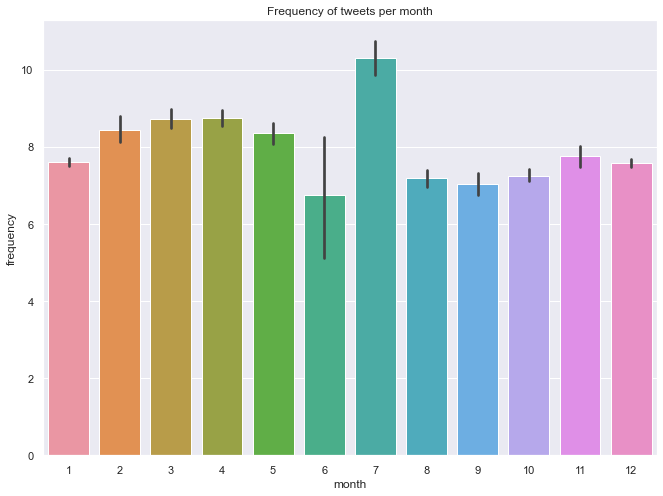

In [33]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="month", y="frequency").set(title="Frequency of tweets per month");

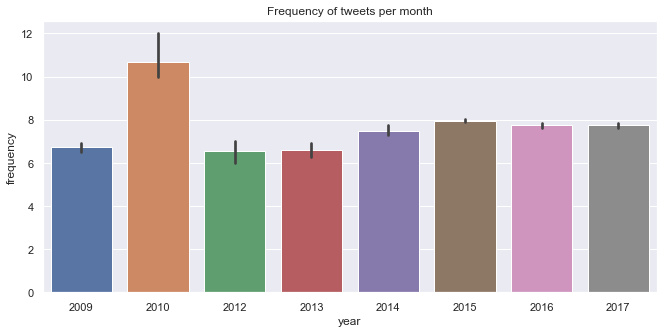

In [34]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="year", y="frequency").set(title="Frequency of tweets per month");

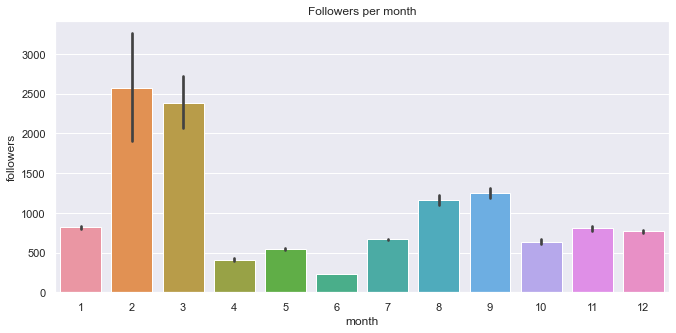

In [35]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="month", y="followers").set(title="Followers per month");

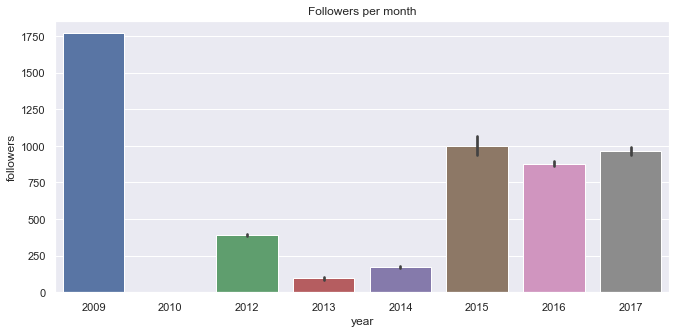

In [36]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="year", y="followers").set(title="Followers per month");

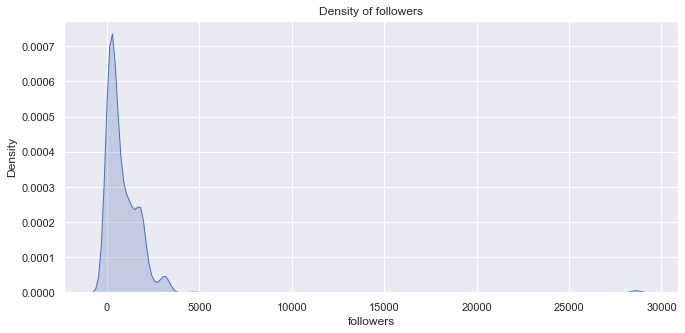

In [37]:
sns.kdeplot(x=df.followers, shade=True,).set(title="Density of followers"); # dağılım grafiği

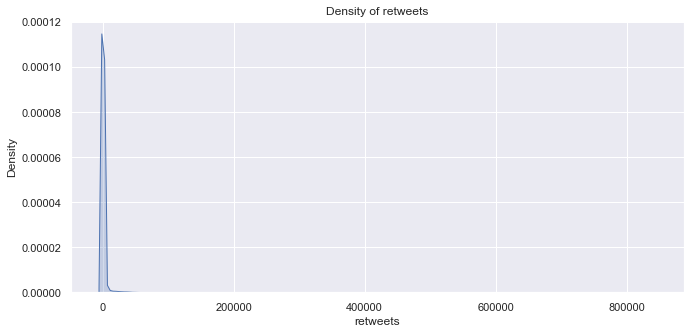

In [38]:
sns.kdeplot(x=df.retweets, shade=True,).set(title="Density of retweets"); # dağılım grafiği

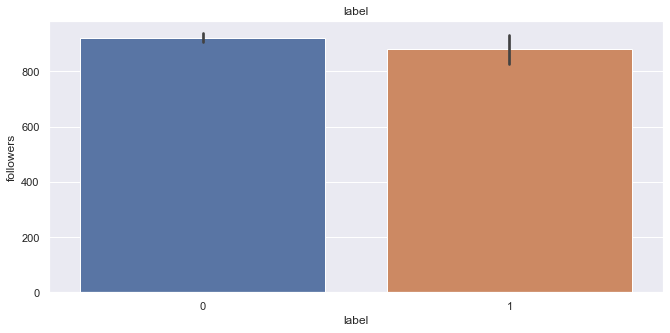

In [39]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="label", y="followers").set(title="label");

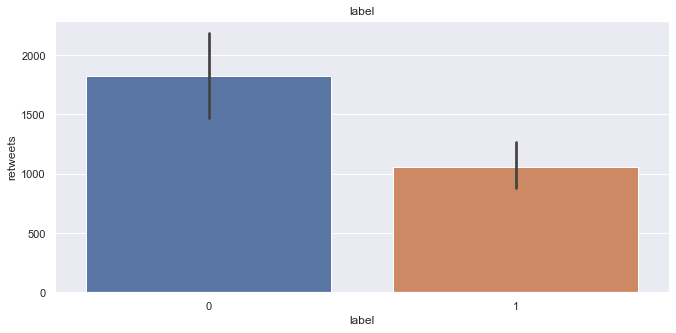

In [40]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="label", y="retweets").set(title="label");

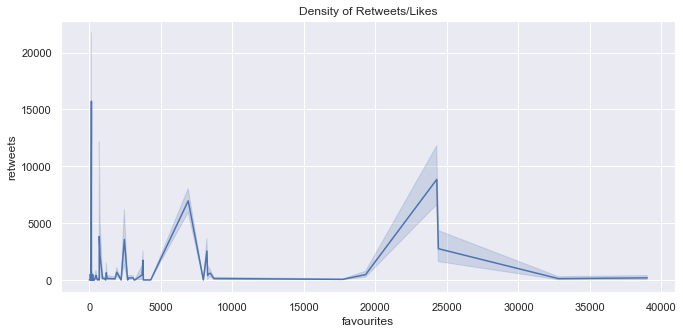

In [41]:
sns.lineplot(data=df, x="favourites", y="retweets").set(title="Density of Retweets/Likes");

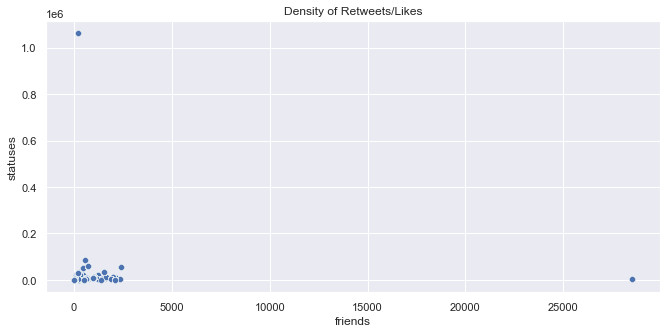

In [42]:
sns.scatterplot(data=df, x="friends", y="statuses",).set(title="Density of Retweets/Likes");

# Sentiment

In [48]:
!pip install textblob 

In [49]:
from textblob import TextBlob

In [50]:
blob_emptyline2 = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment
    blob_emptyline2.append(blob)

In [51]:
df_blob2 = pd.DataFrame(blob_emptyline2)

In [52]:
df_blob3 = pd.concat([df.reset_index(drop=True), df_blob2], axis=1)
df_blob3.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,polarity,subjectivity
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,"[years, since, diagnosed, anxiety, depression,...",14,0.100000,1.000000
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,"[sunday, need, break, im, planning, spend, lit...",9,-0.093750,0.750000
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6,-0.400000,0.700000
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",16,0.900000,0.875000
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,"[hard, say, whether, packing, lists, making, l...",14,-0.045833,0.370833


In [53]:
df_blob3["Sentiment"] =  np.where(df_blob3["polarity"] >= 0 , "Positive", "Negative")

In [61]:
df_blob3.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,polarity,subjectivity,Sentiment
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,"[years, since, diagnosed, anxiety, depression,...",14,0.100000,1.000000,Positive
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,"[sunday, need, break, im, planning, spend, lit...",9,-0.093750,0.750000,Negative
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6,-0.400000,0.700000,Negative
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",16,0.900000,0.875000,Positive
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,"[hard, say, whether, packing, lists, making, l...",14,-0.045833,0.370833,Negative


# Result 

In [55]:
result = df_blob3["Sentiment"].value_counts()

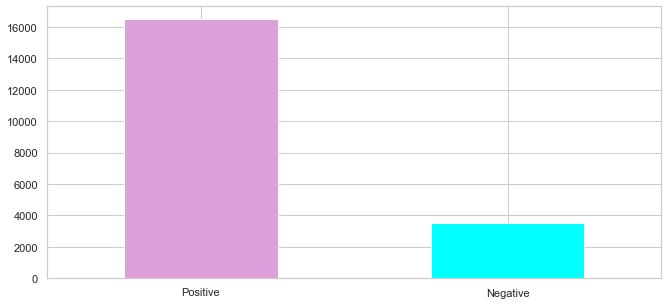

In [57]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [62]:
df_blob3.groupby("Sentiment").count()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,polarity,subjectivity
Sentiment,,,,,,,,,,,,,
Negative,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517
Positive,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483


In [65]:
df_blob3.groupby("polarity").max()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,subjectivity,Sentiment
polarity,,,,,,,,,,,,,
-1.000000,worst bumbling stumbling statement ive seen in...,3088,2389,24407,1063601,39124,1,12,2017,"[worst, bumbling, stumbling, statement, ive, s...",15,1.000000,Negative
-0.900000,sickening httpstcokoohihbrx,677,2057,8375,12913,29,1,12,2017,"[sickening, httpstcokoohihbrx]",10,1.000000,Negative
-0.900000,keitholbermann thats one word would go traitor...,126,621,22,2111,2,0,1,2017,"[keitholbermann, thats, one, word, would, go, ...",10,1.000000,Negative
-0.875000,gop lawmaker asks twitter vote whether obamaca...,884,2389,8466,57269,0,0,1,2017,"[gop, lawmaker, asks, twitter, vote, whether, ...",13,1.000000,Negative
-0.857143,sick perceived anything everything im told dri...,288,988,280,6694,0,1,12,2015,"[sick, perceived, anything, everything, im, to...",8,0.928571,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.850000,woof_all__pets beautiful kitty,3088,2389,32804,86352,20349,1,12,2017,"[woof_all__pets, beautiful, kitty]",12,1.000000,Positive
0.866667,saw pitch perfect daughter today loved rebel w...,734,1899,154,5929,0,1,5,2015,"[saw, pitch, perfect, daughter, today, loved, ...",10,0.933333,Positive
0.883333,rt phoebejtonkin happy birthday beautiful shel...,235,185,24407,22302,1426,0,1,2017,"[rt, phoebejtonkin, happy, birthday, beautiful...",13,0.766667,Positive


In [69]:
df[df["post_text"].str.contains("zayn")]
TextBlob(df.iloc[6250,0]).tags

[('rt', 'NN'),
 ('zaynmalikind', 'NN'),
 ('boys', 'JJ'),
 ('backstage', 'NN'),
 ('bbmas', 'NN'),
 ('httptcolyyjyzu', 'NN')]

In [71]:
df[df["post_text"].str.contains("bumbling")]
TextBlob(df.iloc[12571,0]).tags

[('worst', 'RB'),
 ('bumbling', 'VBG'),
 ('stumbling', 'VBG'),
 ('statement', 'NN'),
 ('ive', 'JJ'),
 ('seen', 'VBN'),
 ('intergity', 'NN'),
 ('credibility', 'NN'),
 ('sense', 'NN'),
 ('said', 'VBD'),
 ('httpstcosmlgulemt', 'NN')]